<a href="https://colab.research.google.com/github/scottthomaswx/RAP-Analysis/blob/main/RAPAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Needed Packages

In [1]:
# @title
%%capture
!pip install siphon
!pip install xarray
!pip install metpy
!pip install matplotlib
!pip install numpy
!pip install cartopy
!pip install warnings
!pip install netCDF4
#Import Packages
from siphon.catalog import TDSCatalog
import xarray as xr
import metpy
from metpy.units import units
import matplotlib.pyplot as plt
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import metpy.calc as mpcalc
import warnings
warnings.filterwarnings('ignore')
from metpy.plots import ctables
import netCDF4
from metpy.plots import USCOUNTIES
import matplotlib.patches as mpatches

#Input Lookup Parameters

In [3]:
year = "2017" # @param {type:"string"}
month = "03" # @param {type:"string"}
day = "08" # @param {type:"string"}
hour_utc = "15" # @param {type:"string"}
timetype = 'Archive' # @param ["Realtime", "Archive"]

## Evaluate Data Sources To See Where Requested RAP/RUC Data is Located (Only Run Once Per Date-Time)
#Dataset Order
 1. UCAR Archive 13km (Includes Realtime)
 2. NCEI 13km Operational Archive
 3. NCEI 13km Non-Operational Archive
 4. NCEI 13km RUC Archive
 5. Repeat 1-4 for 20km RAP/RUC








In [4]:
# @title
#Pull Rap Data For Case/Selected Time/Date And Open Dataset

#Dataset Order (20km First Then 13km)
#Realtime/Past 3 Days -> UCAR Archive
#NCEI Operational Archive
#NCEI Non-Operational Archive
#NCEI RUC Archive
if timetype == 'Archive':
  try:
    tds_RAP = TDSCatalog(f'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RAP/CONUS_13km/RR_CONUS_13km_{year}{month}{day}_{hour_utc}00.grib2/catalog.html')
    rap_ds=tds_RAP.datasets[0]
    ds=xr.open_dataset(rap_ds.access_urls['OPENDAP'])
    ds=ds.isel(time=0)
    print('Using UCAR 13km Dataset')
  except:
    try:
      tds_RAP=TDSCatalog(f'https://www.ncei.noaa.gov/thredds/catalog/model-rap130anl/{year}{month}/{year}{month}{day}/catalog.html?dataset=rap130anl/{year}{month}/{year}{month}{day}/rap_130_{year}{month}{day}_{hour_utc}00_000.grb2')
      rap_ds=tds_RAP.datasets[0]
      ds=xr.open_dataset(rap_ds.access_urls['OPENDAP'])
      ds=ds.isel(time=0)
      print('Using NCEI 13km RAP Operational Archive')
    except:
      try:
        tds_RAP = TDSCatalog(f'https://www.ncei.noaa.gov/thredds/catalog/model-rap130anl-old/{year}{month}/{year}{month}{day}/catalog.html?dataset=rap130anl-old/{year}{month}/{year}{month}{day}/rap_130_{year}{month}{day}_{hour_utc}00_000.grb2')
        rap_ds=tds_RAP.datasets[0]
        ds=xr.open_dataset(rap_ds.access_urls['OPENDAP'])
        ds=ds.isel(time=0)
        print('Using NCEI 13km RAP Non-Operational Archive')
      except:
        try:
          tds_RAP = TDSCatalog(f'https://www.ncei.noaa.gov/thredds/catalog/model-ruc130anl/{year}{month}/{year}{month}{day}/catalog.html?dataset=ruc130anl/{year}{month}/{year}{month}{day}/ruc2anl_130_{year}{month}{day}_{hour_utc}00_000.grb2')
          rap_ds=tds_RAP.datasets[0]
          ds=xr.open_dataset(rap_ds.access_urls['OPENDAP'])
          ds=ds.isel(time=0)
          print('Using NCEI 13km RUC Archive')
        except:
            try:
              tds_RAP = TDSCatalog(f'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RAP/CONUS_20km/RR_CONUS_20km_{year}{month}{day}_{hour_utc}00.grib2/catalog.html')
              rap_ds=tds_RAP.datasets[0]
              ds=xr.open_dataset(rap_ds.access_urls['OPENDAP'])
              ds=ds.isel(time=0)
              print('Using UCAR 20km Dataset')
            except:
              try:
                tds_RAP=TDSCatalog(f'https://www.ncei.noaa.gov/thredds/catalog/model-rap252anl/{year}{month}/{year}{month}{day}/catalog.html?dataset=rap252anl/{year}{month}/{year}{month}{day}/rap_252_{year}{month}{day}_{hour_utc}00_000.grb2')
                rap_ds=tds_RAP.datasets[0]
                ds=xr.open_dataset(rap_ds.access_urls['OPENDAP'])
                ds=ds.isel(time=0)
                print('Using NCEI 20km RAP Operational Archive')
              except:
                try:
                  tds_RAP = TDSCatalog(f'https://www.ncei.noaa.gov/thredds/catalog/model-rap252anl-old/{year}{month}/{year}{month}{day}/catalog.html?dataset=rap252anl-old/{year}{month}/{year}{month}{day}/rap_252_{year}{month}{day}_{hour_utc}00_000.grb2')
                  rap_ds=tds_RAP.datasets[0]
                  ds=xr.open_dataset(rap_ds.access_urls['OPENDAP'])
                  ds=ds.isel(time=0)
                  print('Using NCEI 20km RAP Non-Operational Archive')
                except:
                  try:
                    tds_RAP = TDSCatalog(f'https://www.ncei.noaa.gov/thredds/catalog/model-ruc252anl/{year}{month}/{year}{month}{day}/catalog.html?dataset=ruc252anl/{year}{month}/{year}{month}{day}/ruc2anl_252_{year}{month}{day}_{hour_utc}00_0.grb2')
                    rap_ds=tds_RAP.datasets[0]
                    ds=xr.open_dataset(rap_ds.access_urls['OPENDAP'])
                    ds=ds.isel(time=0)
                    print('Using NCEI 20km RUC Archive')
                  except:
                    print('The Date and Time You Are Looking For Is In A RAP/RUC Dataset Gap and is Unavailable')
if timetype == 'Realtime':
    try:
      tds_RAP=TDSCatalog(f'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RAP/CONUS_13km/latest.html')
      rap_ds=tds_RAP.datasets[0]
      ds=xr.open_dataset(rap_ds.access_urls['OPENDAP'])
      ds=ds.isel(time=0)
      print('Using UCAR 13km Dataset')
    except:
      tds_RAP=TDSCatalog(f'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RAP/CONUS_20km/latest.html')
      rap_ds=tds_RAP.datasets[0]
      ds=xr.open_dataset(rap_ds.access_urls['OPENDAP'])
      ds=ds.isel(time=0)
      print('Using UCAR 20km Dataset')



Using NCEI 13km RAP Non-Operational Archive


#Pull and Parse Needed Data

In [5]:
# @title
#pull parameters

#Pressure
mSLP=ds.metpy.parse_cf('MSLP_MAPS_System_Reduction_msl').metpy.convert_units('hPa')
pres = ds.metpy.parse_cf('Pressure_surface')

#GPH and Level Definitions
gph2=ds.metpy.parse_cf('Geopotential_height_isobaric')
level_def2=np.where(gph2.isobaric==25000)[0][0]
gph2select=gph2.isel(isobaric=level_def2).metpy.convert_units('dam')

gph5=ds.metpy.parse_cf('Geopotential_height_isobaric')
level_def5=np.where(gph5.isobaric==50000)[0][0]
gph5select=gph5.isel(isobaric=level_def5).metpy.convert_units('dam')

gph8=ds.metpy.parse_cf('Geopotential_height_isobaric')
level_def8=np.where(gph8.isobaric==85000)[0][0]
gph8select=gph8.isel(isobaric=level_def8).metpy.convert_units('dam')

gph4=ds.metpy.parse_cf('Geopotential_height_isobaric')
level_def4=np.where(gph4.isobaric==40000)[0][0]
gph4select=gph4.isel(isobaric=level_def4).metpy.convert_units('dam')

gph7=ds.metpy.parse_cf('Geopotential_height_isobaric')
level_def7=np.where(gph7.isobaric==85000)[0][0]
gph7select=gph7.isel(isobaric=level_def7).metpy.convert_units('dam')

gph9=ds.metpy.parse_cf('Geopotential_height_isobaric')
level_def9=np.where(gph5.isobaric==92500)[0][0]
gph9select=gph9.isel(isobaric=level_def9).metpy.convert_units('dam')

gph10=ds.metpy.parse_cf('Geopotential_height_isobaric')
level_def10=np.where(gph5.isobaric==100000)[0][0]
gph10select=gph10.isel(isobaric=level_def10).metpy.convert_units('dam')

#Thickness
thickness105 = (gph5select - gph10select).metpy.convert_units('m')
thickness107 = (gph7select - gph10select).metpy.convert_units('m')
thickness108 = (gph8select - gph10select).metpy.convert_units('m')
thickness87 = (gph7select - gph8select).metpy.convert_units('m')

#Winds Aloft
u_wind2=ds.metpy.parse_cf('u-component_of_wind_isobaric').isel(isobaric=level_def2).metpy.convert_units('kts')
v_wind2=ds.metpy.parse_cf('v-component_of_wind_isobaric').isel(isobaric=level_def2).metpy.convert_units('kts')

u_wind5=ds.metpy.parse_cf('u-component_of_wind_isobaric').isel(isobaric=level_def5).metpy.convert_units('kts')
v_wind5=ds.metpy.parse_cf('v-component_of_wind_isobaric').isel(isobaric=level_def5).metpy.convert_units('kts')

u_wind8=ds.metpy.parse_cf('u-component_of_wind_isobaric').isel(isobaric=level_def8).metpy.convert_units('kts')
v_wind8=ds.metpy.parse_cf('v-component_of_wind_isobaric').isel(isobaric=level_def8).metpy.convert_units('kts')

u_wind4=ds.metpy.parse_cf('u-component_of_wind_isobaric').isel(isobaric=level_def4).metpy.convert_units('kts')
v_wind4=ds.metpy.parse_cf('v-component_of_wind_isobaric').isel(isobaric=level_def4).metpy.convert_units('kts')

u_wind7=ds.metpy.parse_cf('u-component_of_wind_isobaric').isel(isobaric=level_def7).metpy.convert_units('kts')
v_wind7=ds.metpy.parse_cf('v-component_of_wind_isobaric').isel(isobaric=level_def7).metpy.convert_units('kts')

u_wind9=ds.metpy.parse_cf('u-component_of_wind_isobaric').isel(isobaric=level_def9).metpy.convert_units('kts')
v_wind9=ds.metpy.parse_cf('v-component_of_wind_isobaric').isel(isobaric=level_def9).metpy.convert_units('kts')

u_wind10=ds.metpy.parse_cf('u-component_of_wind_isobaric').isel(isobaric=level_def10).metpy.convert_units('kts')
v_wind10=ds.metpy.parse_cf('v-component_of_wind_isobaric').isel(isobaric=level_def10).metpy.convert_units('kts')

wind2=mpcalc.wind_speed(u_wind2,v_wind2)
wind5=mpcalc.wind_speed(u_wind5,v_wind5)
wind7=mpcalc.wind_speed(u_wind7,v_wind7)
wind8=mpcalc.wind_speed(u_wind8,v_wind8)
wind9=mpcalc.wind_speed(u_wind9,v_wind9)

uwind108 = ds.metpy.parse_cf('u-component_of_wind_isobaric')
vwind108 = ds.metpy.parse_cf('v-component_of_wind_isobaric')
LayerU108 = uwind108[30:37]
LayerV108 = vwind108[30:37]
U108_Mean = np.mean(LayerU108, axis = 0) * units.meter/units.second
V108_Mean = np.mean(LayerV108, axis = 0) * units.meter/units.second

#Surface Winds
sfc_u=ds.metpy.parse_cf('u-component_of_wind_height_above_ground')
sfc_v=ds.metpy.parse_cf('v-component_of_wind_height_above_ground')
gust = ds.metpy.parse_cf('Wind_speed_gust_surface').metpy.convert_units('knots')

try:
  sfc_level=np.where(sfc_u.height_above_ground5==10.)[0][0]
  sfc_u_wind=ds.metpy.parse_cf('u-component_of_wind_height_above_ground').isel(height_above_ground5=sfc_level).metpy.convert_units('knots')
  sfc_v_wind=ds.metpy.parse_cf('v-component_of_wind_height_above_ground').isel(height_above_ground5=sfc_level).metpy.convert_units('knots')
except:
  try:
    sfc_level=np.where(sfc_u.height_above_ground4==10.)[0][0]
    sfc_u_wind=ds.metpy.parse_cf('u-component_of_wind_height_above_ground').isel(height_above_ground4=sfc_level).metpy.convert_units('knots')
    sfc_v_wind=ds.metpy.parse_cf('v-component_of_wind_height_above_ground').isel(height_above_ground4=sfc_level).metpy.convert_units('knots')
  except:
    try:
      sfc_level=np.where(sfc_u.height_above_ground3==10.)[0][0]
      sfc_u_wind=ds.metpy.parse_cf('u-component_of_wind_height_above_ground').isel(height_above_ground3=sfc_level).metpy.convert_units('knots')
      sfc_v_wind=ds.metpy.parse_cf('v-component_of_wind_height_above_ground').isel(height_above_ground3=sfc_level).metpy.convert_units('knots')
    except:
      try:
        sfc_level=np.where(sfc_u.height_above_ground2==10.)[0][0]
        sfc_u_wind=ds.metpy.parse_cf('u-component_of_wind_height_above_ground').isel(height_above_ground2=sfc_level).metpy.convert_units('knots')
        sfc_v_wind=ds.metpy.parse_cf('v-component_of_wind_height_above_ground').isel(height_above_ground2=sfc_level).metpy.convert_units('knots')
      except:
        try:
          sfc_level=np.where(sfc_u.height_above_ground1==10.)[0][0]
          sfc_u_wind=ds.metpy.parse_cf('u-component_of_wind_height_above_ground').isel(height_above_ground1=sfc_level).metpy.convert_units('knots')
          sfc_v_wind=ds.metpy.parse_cf('v-component_of_wind_height_above_ground').isel(height_above_ground1=sfc_level).metpy.convert_units('knots')
        except:
          try:
            sfc_level=np.where(sfc_u.height_above_ground==10.)[0][0]
            sfc_u_wind=ds.metpy.parse_cf('u-component_of_wind_height_above_ground').isel(height_above_ground=sfc_level).metpy.convert_units('knots')
            sfc_v_wind=ds.metpy.parse_cf('v-component_of_wind_height_above_ground').isel(height_above_ground=sfc_level).metpy.convert_units('knots')
          except:
            pass

#Surface Temps
TMP2m=ds.metpy.parse_cf('Temperature_height_above_ground')
try:
  sfctmplevel=np.where(TMP2m.height_above_ground2 == 2. )[0][0]
  sfcTMP=TMP2m.isel(height_above_ground2=sfctmplevel).metpy.convert_units('degC')
except:
  try:
    sfctmplevel=np.where(TMP2m.height_above_ground1 == 2. )[0][0]
    sfcTMP=TMP2m.isel(height_above_ground1=sfctmplevel).metpy.convert_units('degC')
  except:
    try:
      sfctmplevel=np.where(TMP2m.height_above_ground == 2. )[0][0]
      sfcTMP=TMP2m.isel(height_above_ground=sfctmplevel).metpy.convert_units('degC')
    except:
      pass

skintemp = ds.metpy.parse_cf('Temperature_surface').metpy.convert_units('degC')

#Temps Aloft
T_UA8 = ds.metpy.parse_cf('Temperature_isobaric').isel(isobaric=level_def8).metpy.convert_units('degC')
T_UA7 = ds.metpy.parse_cf('Temperature_isobaric').isel(isobaric=level_def7).metpy.convert_units('degC')
T_UA5 = ds.metpy.parse_cf('Temperature_isobaric').isel(isobaric=level_def5).metpy.convert_units('degC')
T_UA9 = ds.metpy.parse_cf('Temperature_isobaric').isel(isobaric=level_def9).metpy.convert_units('degC')
T_UA10 = ds.metpy.parse_cf('Temperature_isobaric').isel(isobaric=level_def10).metpy.convert_units('degC')

TK_UA5 = ds.metpy.parse_cf('Temperature_isobaric').isel(isobaric=level_def5).metpy.convert_units('K')
TK_UA7 = ds.metpy.parse_cf('Temperature_isobaric').isel(isobaric=level_def7).metpy.convert_units('K')
TK_UA8 = ds.metpy.parse_cf('Temperature_isobaric').isel(isobaric=level_def8).metpy.convert_units('K')
TK_UA9 = ds.metpy.parse_cf('Temperature_isobaric').isel(isobaric=level_def9).metpy.convert_units('K')
TK_UA10 = ds.metpy.parse_cf('Temperature_isobaric').isel(isobaric=level_def10).metpy.convert_units('K')

sfch8tdiff = (T_UA8 - skintemp) * -1

#Lapse Rates Aloft
dT75 = T_UA5-T_UA7
dTS7 = T_UA7 - sfcTMP
dT108 = T_UA8-T_UA10
dZ75 = (gph5select.metpy.convert_units('m') - gph7select.metpy.convert_units('m'))/1000
dZ108 = (gph8select.metpy.convert_units('m') - gph10select.metpy.convert_units('m'))/1000
dZS7 = (gph7select.metpy.convert_units('m') - 2*units.m)/1000

LR75 = -1 * (dT75/dZ75)
LRS7 = -1 * (dTS7/dZS7)
LR108 = -1 * (dT108/dZ108)

#Theta/FGEN
thta5 = mpcalc.potential_temperature(500*units.mbar,TK_UA5)
fgen5 = mpcalc.frontogenesis(thta5,u_wind5.metpy.convert_units('m/s'),v_wind5.metpy.convert_units('m/s'),dx=	13545.087*units.m, dy =	13545.087*units.m)
thta7 = mpcalc.potential_temperature(700*units.mbar,TK_UA7)
fgen7 = mpcalc.frontogenesis(thta7,u_wind7.metpy.convert_units('m/s'),v_wind7.metpy.convert_units('m/s'),dx=	13545.087*units.m, dy =	13545.087*units.m)
thta8 = mpcalc.potential_temperature(850*units.mbar,TK_UA8)
fgen8 = mpcalc.frontogenesis(thta8,u_wind8.metpy.convert_units('m/s'),v_wind8.metpy.convert_units('m/s'),dx=	13545.087*units.m, dy =	13545.087*units.m)
thta9 = mpcalc.potential_temperature(925*units.mbar,TK_UA9)
fgen9 = mpcalc.frontogenesis(thta9,u_wind9.metpy.convert_units('m/s'),v_wind9.metpy.convert_units('m/s'),dx=	13545.087*units.m, dy =	13545.087*units.m)
thta10 = mpcalc.potential_temperature(100*units.mbar,TK_UA10)
fgen10 = mpcalc.frontogenesis(thta10,u_wind10.metpy.convert_units('m/s'),v_wind10.metpy.convert_units('m/s'),dx=	13545.087*units.m, dy =	13545.087*units.m)

fgen5_stripped = fgen5 * units.meter * units.second / units.kelvin
fgen_scaled5 = fgen5_stripped * 100000. * 3600. * 3.
fgen_smooth5 = mpcalc.smooth_gaussian(fgen_scaled5,5)

fgen7_stripped = fgen7 * units.meter * units.second / units.kelvin
fgen_scaled7 = fgen7_stripped * 100000. * 3600. * 3.
fgen_smooth7 = mpcalc.smooth_gaussian(fgen_scaled7,5)

fgen8_stripped = fgen8 * units.meter * units.second / units.kelvin
fgen_scaled8 = fgen8_stripped * 100000. * 3600. * 3.
fgen_smooth8 = mpcalc.smooth_gaussian(fgen_scaled8,5)

fgen9_stripped = fgen9 * units.meter * units.second / units.kelvin
fgen_scaled9 = fgen9_stripped * 100000. * 3600. * 3.
fgen_smooth9 = mpcalc.smooth_gaussian(fgen_scaled9,5)

fgen10_stripped = fgen10 * units.meter * units.second / units.kelvin
fgen_scaled10 = fgen10_stripped * 100000. * 3600. * 3.
fgen_smooth10 = mpcalc.smooth_gaussian(fgen_scaled10,5)

#Sfc FGEN
TMP2mK=sfcTMP.metpy.convert_units('K')
thtaSfc = mpcalc.potential_temperature(pres,TMP2mK)
fgenSfc = mpcalc.frontogenesis(thtaSfc,sfc_u_wind.metpy.convert_units('m/s'),sfc_u_wind.metpy.convert_units('m/s'),dx=	13545.087*units.m, dy =	13545.087*units.m)

fgenSfc_stripped = fgenSfc * units.meter * units.second / units.kelvin
fgen_scaledSfc = fgenSfc_stripped * 100000. * 3600. * 3.
fgen_smoothSfc = mpcalc.smooth_gaussian(fgen_scaledSfc,5)

#Vorticity
abs_vort5 =mpcalc.vorticity(u_wind5.metpy.convert_units('m/s'),v_wind5.metpy.convert_units('m/s'), dx=	13.545087*units.km, dy=	13.545087*units.km).metpy.convert_units('1/s')
abs_vort5/=10**-5

abs_vort4 =mpcalc.vorticity(u_wind4.metpy.convert_units('m/s'),v_wind4.metpy.convert_units('m/s'), dx=	13.545087*units.km, dy=	13.545087*units.km).metpy.convert_units('1/s')
abs_vort4/=10**-5

abs_vort7 =mpcalc.vorticity(u_wind7.metpy.convert_units('m/s'),v_wind7.metpy.convert_units('m/s'), dx=	13.545087*units.km, dy=	13.545087*units.km).metpy.convert_units('1/s')
abs_vort7/=10**-5

sfc_vort = mpcalc.vorticity(sfc_u_wind.metpy.convert_units('m/s'),sfc_v_wind.metpy.convert_units('m/s'), dx=	13.545087*units.km, dy=	13.545087*units.km).metpy.convert_units('1/s')
sfc_vort/=10**-5

#Divergence Aloft
h2div=mpcalc.divergence(u_wind2,v_wind2, dx=	13.545087*units.km, dy=	13.545087*units.km).metpy.convert_units('1/s')
h2div/=10**-5

h8div=mpcalc.divergence(u_wind8,v_wind8, dx=	13.545087*units.km, dy=	13.545087*units.km).metpy.convert_units('1/s')
h8div/=10**-5

diffdiv = h2div - h8div

div108=mpcalc.divergence(U108_Mean ,V108_Mean, dx=	13545.087*units.m, dy =	13545.087*units.m).metpy.convert_units('1/s')
div108/=10**-5

#Dewpoint
try:
  DPT2m=ds.metpy.parse_cf('Dewpoint_temperature_height_above_ground')
except:
  print("Dewpoint Unavailable")
  pass

try:
  sfcdptlevel=np.where(DPT2m.height_above_ground == 2. )[0][0]
  sfcDPT=DPT2m.isel(height_above_ground=sfcdptlevel).metpy.convert_units('degC')
except:
  try:
    sfcdptlevel=np.where(DPT2m.height_above_ground1 == 2. )[0][0]
    sfcDPT=DPT2m.isel(height_above_ground1=sfcdptlevel).metpy.convert_units('degC')
  except:
    try:
      sfcdptlevel=np.where(DPT2m.height_above_ground2 == 2. )[0][0]
      sfcDPT=DPT2m.isel(height_above_ground2=sfcdptlevel).metpy.convert_units('degC')
    except:
      pass

#PWAT
PWAT=ds.metpy.parse_cf('Precipitable_water_entire_atmosphere_single_layer')/25.4

#RH
RH2 = ds.metpy.parse_cf('Relative_humidity_isobaric').isel(isobaric=level_def2)
RH4 = ds.metpy.parse_cf('Relative_humidity_isobaric').isel(isobaric=level_def4)
RH5 = ds.metpy.parse_cf('Relative_humidity_isobaric').isel(isobaric=level_def5)
RH7 = ds.metpy.parse_cf('Relative_humidity_isobaric').isel(isobaric=level_def7)
RH8 = ds.metpy.parse_cf('Relative_humidity_isobaric').isel(isobaric=level_def8)
RH9 = ds.metpy.parse_cf('Relative_humidity_isobaric').isel(isobaric=level_def9)

RH107_Layer = ds.metpy.parse_cf('Relative_humidity_isobaric')
LayerRH107 = RH107_Layer[24:37]
RH107_Mean = np.mean(LayerRH107, axis = 0)

RH108_Layer = ds.metpy.parse_cf('Relative_humidity_isobaric')
LayerRH108 = RH108_Layer[30:37]
RH108_Mean = np.mean(LayerRH107, axis = 0)

RH87_Layer = ds.metpy.parse_cf('Relative_humidity_isobaric')
LayerRH87 = RH87_Layer[24:30]
RH87_Mean = np.mean(LayerRH107, axis = 0)

#Convective
cape = ds.metpy.parse_cf('Convective_available_potential_energy_pressure_difference_layer')
sfccape = ds.metpy.parse_cf('Convective_available_potential_energy_surface')
cin = ds.metpy.parse_cf('Convective_inhibition_pressure_difference_layer')
sfccin = ds.metpy.parse_cf('Convective_inhibition_surface')

SRH=ds.metpy.parse_cf('Storm_relative_helicity_height_above_ground_layer')
try:
  SRH1=SRH.isel(height_above_ground_layer2 = 0)
except:
  try:
   SRH1=SRH.isel(height_above_ground_layer1 = 0)
  except:
    try:
        SRH1=SRH.isel(height_above_ground_layer = 0)
    except:
      pass
try:
  SRH3=SRH.isel(height_above_ground_layer2 = 1)
except:
  try:
    SRH3=SRH.isel(height_above_ground_layer1 = 1)
  except:
    try:
      SRH3=SRH.isel(height_above_ground_layer = 1)
    except:
      pass

u_shear5 = u_wind5 - sfc_u_wind
v_shear5 = v_wind5 - sfc_v_wind
shear5 = np.sqrt((u_shear5**2)+(v_shear5**2))

u_shear7 = u_wind7 - sfc_u_wind
v_shear7 = v_wind7 - sfc_v_wind
shear7 = np.sqrt((u_shear7**2)+(v_shear7**2))

u_shear8 = u_wind8 - sfc_u_wind
v_shear8 = v_wind8 - sfc_v_wind
shear8 = np.sqrt((u_shear8**2)+(v_shear8**2))

u_shear9 = u_wind9 - sfc_u_wind
v_shear9 = v_wind9 - sfc_v_wind
shear9 = np.sqrt((u_shear9**2)+(v_shear9**2))

SFCLI =  ds.metpy.parse_cf('Surface_Lifted_Index_isobaric_layer').isel(isobaric_layer=0)
MULI = ds.metpy.parse_cf('Best_4_layer_Lifted_Index_pressure_difference_layer').isel(pressure_difference_layer=0)

try:
  CAPE03= ds.metpy.parse_cf('Convective_available_potential_energy_height_above_ground_layer').isel(height_above_ground_layer1=0)
except:
  print("0-3km CAPE Unavailable")
  pass

try:
  MLCAPE= ds.metpy.parse_cf('Convective_available_potential_energy_pressure_difference_layer').isel(pressure_difference_layer2 = 0)
  BESTCAPE= ds.metpy.parse_cf('Convective_available_potential_energy_pressure_difference_layer').isel(pressure_difference_layer2 = 1)
  MUCAPE= ds.metpy.parse_cf('Convective_available_potential_energy_pressure_difference_layer').isel(pressure_difference_layer2 = 2)
  MLCIN= ds.metpy.parse_cf('Convective_inhibition_pressure_difference_layer').isel(pressure_difference_layer2 = 0)
  BESTCIN= ds.metpy.parse_cf('Convective_inhibition_pressure_difference_layer').isel(pressure_difference_layer2 = 1)
  MUCIN= ds.metpy.parse_cf('Convective_inhibition_pressure_difference_layer').isel(pressure_difference_layer2 = 2)
except:
  try:
    MLCAPE= ds.metpy.parse_cf('Convective_available_potential_energy_pressure_difference_layer').isel(pressure_difference_layer1 = 0)
    BESTCAPE= ds.metpy.parse_cf('Convective_available_potential_energy_pressure_difference_layer').isel(pressure_difference_layer1 = 1)
    MUCAPE= ds.metpy.parse_cf('Convective_available_potential_energy_pressure_difference_layer').isel(pressure_difference_layer1 = 2)
    MLCIN= ds.metpy.parse_cf('Convective_inhibition_pressure_difference_layer').isel(pressure_difference_layer1 = 0)
    BESTCIN= ds.metpy.parse_cf('Convective_inhibition_pressure_difference_layer').isel(pressure_difference_layer1 = 1)
    MUCIN= ds.metpy.parse_cf('Convective_inhibition_pressure_difference_layer').isel(pressure_difference_layer1 = 2)
  except:
    pass

try:
  ESRH= ds.metpy.parse_cf('Effective_Storm_Relative_Helicity_surface')
except:
  print('Effective SRH Unavailable')
  pass

#Vertical Motion/Omega
omega9 = ds.metpy.parse_cf('Vertical_velocity_pressure_isobaric').isel(isobaric=level_def9).metpy.convert_units('dPa/s')
omega8 = ds.metpy.parse_cf('Vertical_velocity_pressure_isobaric').isel(isobaric=level_def8).metpy.convert_units('dPa/s')
omega7 = ds.metpy.parse_cf('Vertical_velocity_pressure_isobaric').isel(isobaric=level_def7).metpy.convert_units('dPa/s')

#Fire Wx
try:
  HI = ds.metpy.parse_cf('Haines_index_surface')
except:
  print('Haines Index Unavailable')
  pass

#Aviation
try:
  cig = ds.metpy.parse_cf('Geopotential_height_cloud_ceiling').metpy.convert_units('feet')
except:
  print("Ceiling Data Unavailable")
  pass

visby = ds.metpy.parse_cf('Visibility_surface').metpy.convert_units('miles')

#Winter Wx
wbzhgt = ds.metpy.parse_cf('Geopotential_height_lowest_level_of_the_wet_bulb_zero').metpy.convert_units('m')
FZL = ds.metpy.parse_cf('Geopotential_height_zeroDegC_isotherm').metpy.convert_units('m')

PotRA = ds.metpy.parse_cf('Categorical_Rain_surface')
PotSN = ds.metpy.parse_cf('Categorical_Snow_surface')
PotZR = ds.metpy.parse_cf('Categorical_Freezing_Rain_surface')
PotIP = ds.metpy.parse_cf('Categorical_Ice_Pellets_surface')

#Clouds
try:
  CCTotal = ds.metpy.parse_cf('Total_cloud_cover_entire_atmosphere')
  highcloud = ds.metpy.parse_cf('High_cloud_cover_high_cloud')
  lowcloud = ds.metpy.parse_cf('Low_cloud_cover_low_cloud')
  midcloud = ds.metpy.parse_cf('Medium_cloud_cover_middle_cloud')
except:
  print('Cloud Data Unavailable')
  pass

#Moisture Transport
mr850 = mpcalc.mixing_ratio_from_relative_humidity(850*units.mbar, T_UA8, RH8)
mt850 = mr850*wind8.metpy.convert_units('m/s')*100
mr925 = mpcalc.mixing_ratio_from_relative_humidity(925*units.mbar, T_UA9, RH9)
mt925 = mr925*wind9.metpy.convert_units('m/s')*100

0-3km CAPE Unavailable
Effective SRH Unavailable


##Due to Length of Runtime: Run Wetbulb Only If Interested In Plotting

In [ ]:
# @title
try:
  wetbulb = mpcalc.wet_bulb_temperature(pres, sfcTMP, sfcDPT).metpy.convert_units('degC')
except:
  print('Wetbulb Temp Unavailable')

#Select Parameter To Plot

In [12]:
variable = '925 mb Analysis (Wind Color)' # @param ["Synoptic 4-Panel", "250 mb Analysis", "500 mb Vorticity", "500 mb Winds", "700 mb Analysis", "850 mb Analysis (Wind Color)", "850 mb Analysis (Temp Color)", "925 mb Analysis (Wind Color)", "925 mb Analysis (Temp Color)", "Surface Temperature", "Surface Dewpoint", "Surface Pressure/Wind", "Precipitable Water", "4-Panel Frontogenesis", "500 mb Frontogenesis", "700 mb Frontogenesis", "850 mb Frontogenesis", "925 mb Frontogenesis", "Surface Frontogenesis", "Surface CAPE/SFC-500mb Shear", "1000-700 mb RH", "Surface CAPE/0-1km SRH", "Surface CAPE/0-3km SRH", "700-500 mb Lapse Rates", "SFC-700 mb Lapse Rates", "Lake Effect Snow 1", "Lake Effect Snow 2", "Lake Effect Snow 2-Panel", "Surface LI/850mb-500mb Winds", "Most Unstable LI/850mb-500mb Winds", "0-3km CAPE/SFC Vorticity", "Surface CAPE/CIN", "Mixed Layer CAPE/CIN", "Most Unstable CAPE/CIN", "1000-850mb Lapse Rates", "0-1km SRH", "0-3km SRH", "Effective SRH", "Total Cloud Cover", "Low Cloud Cover", "Middle Cloud Cover", "High Cloud Cover", "700mb Heights/Omega", "SFC-500mb Shear", "SFC-700mb Shear", "SFC-850mb Shear", "SFC-925mb Shear", "Visibility (Flight Cat)", "Visibility", "Ceiling", "Ceiling (Flight Cat)", "Total Cloud", "Low Cloud", "Mid Cloud", "High Cloud", "Surface Wet Bulb Temperature", "700mb Height/Omega", "850-250mb Diff. Divergence", "850mb Moisture Transport", "925mb Moisture Transport"]

#Set Map Borders

Lower MI: [-86.5, -81.5, 45.5, 40.5]

United States: [-120, -70, 50, 22]

In [8]:
WestLong = -86.5 # @param {type:"number"}
EastLong = -81.5 # @param {type:"number"}
NorthLat = 45.5 # @param {type:"number"}
SouthLat = 40.5 # @param {type:"number"}

#Plot Chosen Map

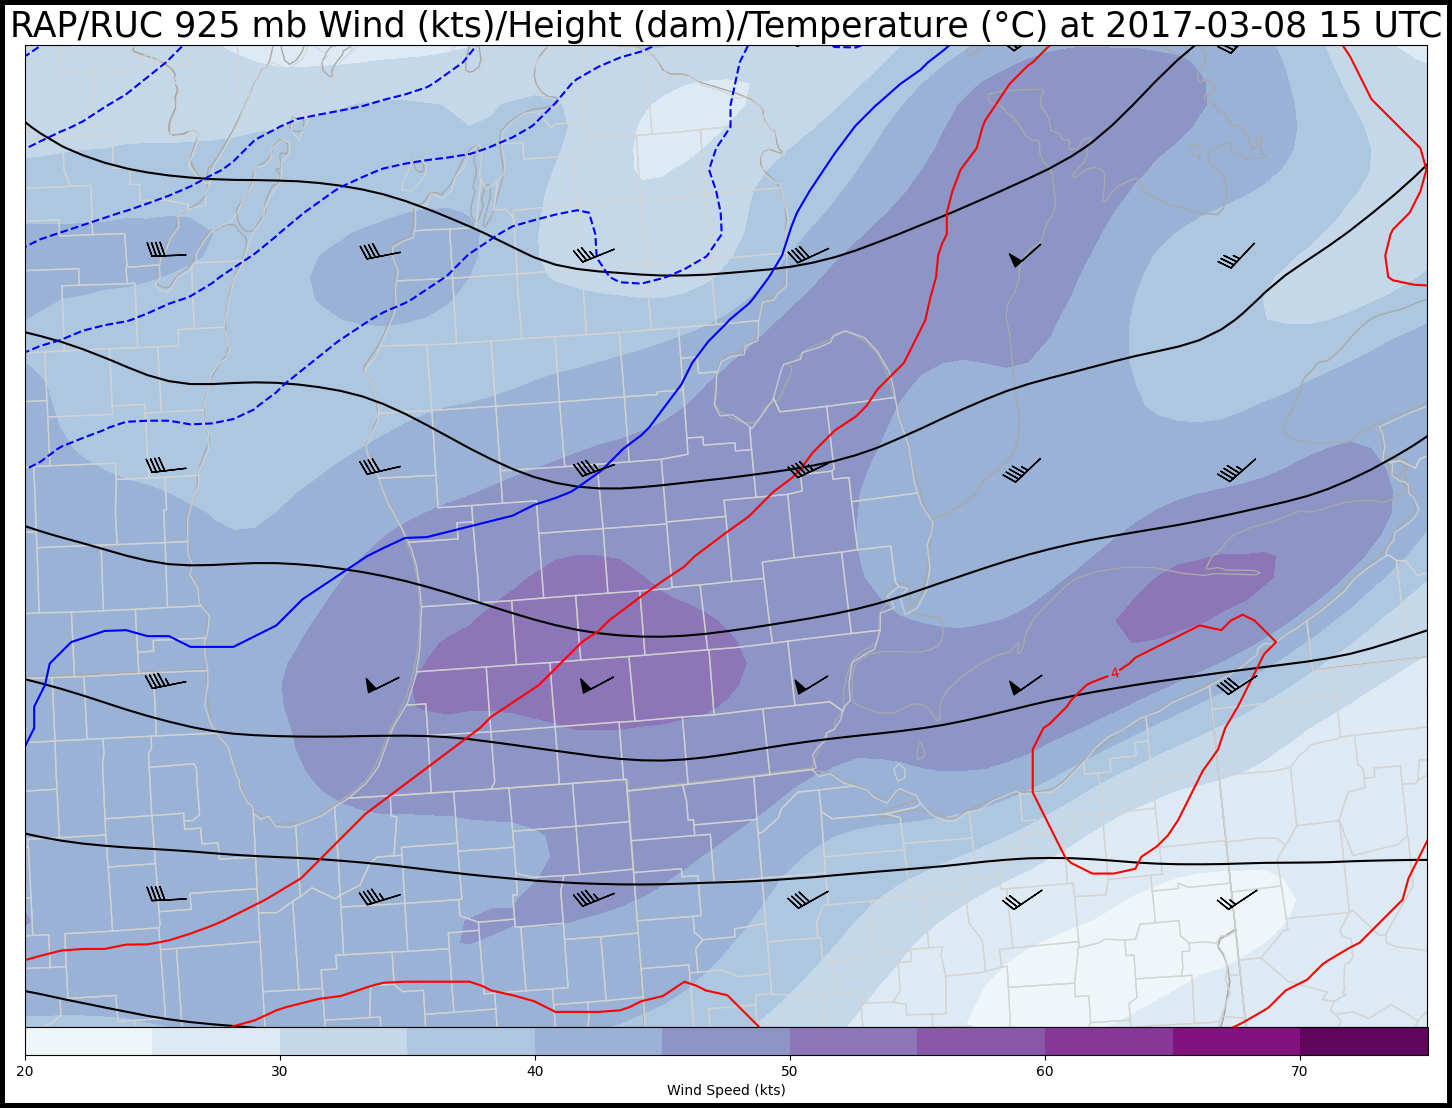

In [13]:
# @title
if variable == 'Synoptic 4-Panel':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(2,2,1,projection=mSLP.metpy.cartopy_crs)
  ax2=fig.add_subplot(2,2,2,projection=mSLP.metpy.cartopy_crs)
  ax3=fig.add_subplot(2,2,3,projection=mSLP.metpy.cartopy_crs)
  ax4=fig.add_subplot(2,2,4,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax2.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax3.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax4.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)
  ax2.set_box_aspect(0.7)
  ax3.set_box_aspect(0.7)
  ax4.set_box_aspect(0.7)


  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 250 mb Wind (kts)/Height (dam) at {year}-{month}-{day} {hour_utc} UTC')

  ax2.coastlines(color='black',resolution='10m')
  ax2.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax2.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax2.set_title(f'RAP/RUC 500 mb Wind (kts)/Height (dam)/Vorticity (10^-5 s^-1) at {year}-{month}-{day} {hour_utc} UTC')

  ax3.coastlines(color='black',resolution='10m')
  ax3.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax3.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax3.set_title(f'RAP/RUC 850 mb Wind (kts)/Height (dam)/Temperature (°C) at {year}-{month}-{day} {hour_utc} UTC')

  ax4.coastlines(color='black',resolution='10m')
  ax4.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax4.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax4.set_title(f'RAP/RUC MSLP (hPa)/Wind (kts)/Temperature (°C) at {year}-{month}-{day} {hour_utc} UTC')


  wind_fill = ax1.contourf(wind2.x,wind2.y,wind2, cmap='BuPu', levels=np.arange(60,201,20))
  plt.colorbar(wind_fill,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Wind Speed (kts)', shrink = 0.905)
  ax1.barbs(u_wind2.x.values[::18], u_wind2.y.values[::18], u_wind2.values[::18, ::18], v_wind2.values[::18, ::18], pivot='middle', color='black', zorder = 99)

  gph_lines2=ax1.contour(gph2select.x,gph2select.y,gph2select, colors='black', levels=np.arange(880,1180,6))
  ax1.clabel(gph_lines2,fmt='%4d', colors='black')

  gph_lines5=ax2.contour(gph5select.x,gph5select.y,gph5select, colors='black', levels=np.arange(420,660,6))
  ax2.clabel(gph_lines5,fmt='%4d', colors='black')

  vort_fill = ax2.contourf(abs_vort5.x, abs_vort5.y, abs_vort5, cmap = 'autumn_r', levels = np.arange(12,61, 4))
  plt.colorbar(vort_fill,orientation='horizontal',pad=0.0, aspect=50, label='Vorticity (10^-5 s^-1)', ax = ax2 , shrink = 0.905 )

  ax2.barbs(u_wind5.x.values[::18], u_wind5.y.values[::18], u_wind5.values[::18, ::18], v_wind5.values[::18, ::18], pivot='middle', color='black', zorder = 99)

  gph_lines8=ax3.contour(gph8select.x,gph8select.y,gph8select, colors='black', levels=np.arange(12,252,3))
  ax3.clabel(gph_lines8,fmt='%4d', colors='black')

  temp_fill = ax3.contourf(T_UA8.x, T_UA8.y, T_UA8, cmap = 'jet', levels = np.arange(-40,41, 4))
  plt.colorbar(temp_fill,orientation='horizontal',pad=0.0, aspect=50, label='Temperature (°C)', ax = ax3 , shrink = 0.905)

  ax3.barbs(u_wind8.x.values[::18], u_wind8.y.values[::18], u_wind8.values[::18, ::18], v_wind8.values[::18, ::18], pivot='middle', color='black', zorder = 99)

  mSLP_lines=ax4.contour(mSLP.x, mSLP.y, mSLP, colors='black', levels=np.arange(960,1040,4))
  ax4.clabel(mSLP_lines,fmt='%4d', colors='black')

  sfctemp_fill = ax1.contourf(sfcTMP.x, sfcTMP.y, sfcTMP, cmap = 'jet', levels = np.arange(-44,45, 4))
  plt.colorbar(sfctemp_fill,orientation='horizontal',pad=0.0, aspect=50, label='Temperature (°C)', ax = ax4 , shrink = 0.905)

  ax4.barbs(sfc_u_wind.x.values[::18], sfc_u_wind.y.values[::18], sfc_u_wind.values[::18, ::18],sfc_v_wind.values[::18, ::18], pivot='middle', color='black', zorder = 99)

  plt.savefig(f'SynopticAnalysis_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == '250 mb Analysis':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 250 mb Wind (kts)/Height (dam)/Divergence (10^-5 s^-1) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  wind_fill = ax1.contourf(wind2.x,wind2.y,wind2, cmap='BuPu', levels=np.arange(60,201,20))
  plt.colorbar(wind_fill,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Wind Speed (kts)', shrink = 0.905)
  ax1.barbs(u_wind2.x.values[::10], u_wind2.y.values[::10], u_wind2.values[::10, ::10], v_wind2.values[::10, ::10], pivot='middle', color='black', zorder = 99)

  gph_lines2=ax1.contour(gph2select.x,gph2select.y,gph2select, colors='black', levels=np.arange(880,1180,6))
  ax1.clabel(gph_lines2,fmt='%4d', colors='black')

  divlines = ax1.contour(h2div.x, h2div.y, h2div, colors = 'magenta', levels = [2,4,6,8,10,12,14])
  ax1.clabel(divlines, fmt = '%4d', colors = 'magenta')

  plt.savefig(f'250mbAnalysis_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == '500 mb Vorticity':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 500 mb Wind (kts)/Height (dam)/Vorticity (10^-5 s^-1) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  gph_lines5=ax1.contour(gph5select.x,gph5select.y,gph5select, colors='black', levels=np.arange(420,660,6))
  ax1.clabel(gph_lines5,fmt='%4d', colors='black')

  vort_fill = ax1.contourf(abs_vort5.x, abs_vort5.y, abs_vort5, cmap = 'autumn_r', levels = np.arange(12,61, 4))
  plt.colorbar(vort_fill,orientation='horizontal',pad=0.0, aspect=50, label='Vorticity (10^-5 s^-1)', ax = ax1 , shrink = 0.905 )

  ax1.barbs(u_wind5.x.values[::10], u_wind5.y.values[::10], u_wind5.values[::10, ::10], v_wind5.values[::10, ::10], pivot='middle', color='black', zorder = 99)

  plt.savefig(f'500mbVorticity_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == '500 mb Winds':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 500 mb Wind (kts)/Height (dam) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 30)

  wind_fill = ax1.contourf(wind5.x,wind5.y,wind5, cmap='BuPu', levels=np.arange(40,181,20))
  plt.colorbar(wind_fill,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Wind Speed (kts)', shrink = 0.905)
  ax1.barbs(u_wind5.x.values[::10], u_wind5.y.values[::10], u_wind5.values[::10, ::10], v_wind5.values[::10, ::10], pivot='middle', color='black', zorder = 99)

  gph_lines5=ax1.contour(gph5select.x,gph5select.y,gph5select, colors='black', levels=np.arange(420,660,6))
  ax1.clabel(gph_lines5,fmt='%4d', colors='black')

  plt.savefig(f'500mbWinds_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "700 mb Analysis":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 700 mb Wind (kts)/Height (dam)/Temperature (°C)/Relative Humidity (%) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  gph_lines7=ax1.contour(gph7select.x,gph7select.y,gph7select, colors='black', levels=np.arange(0,600,3))
  ax1.clabel(gph_lines7,fmt='%4d', colors='black')

  rh_fill = ax1.contourf(RH7.x, RH7.y, RH7, cmap = 'YlGnBu', levels = np.arange(0,101, 5))
  plt.colorbar(rh_fill,orientation='horizontal',pad=0.0, aspect=50, label='Relative Humidity (%)', ax = ax1 , shrink = 0.905)

  ax1.barbs(u_wind7.x.values[::10], u_wind7.y.values[::10], u_wind7.values[::10, ::10], v_wind7.values[::10, ::10], pivot='middle', color='black', zorder = 99)
  subtemplines = ax1.contour(T_UA7.x, T_UA7.y, T_UA7, colors = ['blue'], levels = np.arange(-100,1,4), linestyle = '--')
  ax1.clabel(subtemplines,fmt='%2d', colors = ['blue'])

  plustemplines = ax1.contour(T_UA7.x, T_UA7.y, T_UA7, colors = ['red'], levels = np.arange(4,101,4))
  ax1.clabel(plustemplines,fmt='%2d', colors = ['red'])

  plt.savefig(f'700mbAnalysis_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "850 mb Analysis (Wind Color)":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 850 mb Wind (kts)/Height (dam)/Temperature (°C) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  wind_fill = ax1.contourf(wind8.x,wind8.y,wind8, cmap='BuPu', levels=np.arange(20,76,5))
  plt.colorbar(wind_fill,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Wind Speed (kts)', shrink = 0.905)
  ax1.barbs(u_wind8.x.values[::10], u_wind8.y.values[::10], u_wind8.values[::10, ::10], v_wind8.values[::10, ::10], pivot='middle', color='black', zorder = 99)

  gph_lines8=ax1.contour(gph8select.x,gph8select.y,gph8select, colors='black', levels=np.arange(12,252,3))
  ax1.clabel(gph_lines8,fmt='%4d', colors='black')

  subtemplines = ax1.contour(T_UA8.x, T_UA8.y, T_UA8, colors = ['blue'], levels = np.arange(-100,1,2), linestyle = '--')
  ax1.clabel(subtemplines,fmt='%2d', colors = ['blue'])

  plustemplines = ax1.contour(T_UA8.x, T_UA8.y, T_UA8, colors = ['red'], levels = np.arange(2,101,2))
  ax1.clabel(plustemplines,fmt='%2d', colors = ['red'])

  plt.savefig(f'850mbAnalysisWind_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')


if variable == "850 mb Analysis (Temp Color)":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 850 mb Wind (kts)/Height (dam)/Temperature (°C) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  gph_lines8=ax1.contour(gph8select.x,gph8select.y,gph8select, colors='black', levels=np.arange(12,252,3))
  ax1.clabel(gph_lines8,fmt='%4d', colors='black')

  temp_fill = ax1.contourf(T_UA8.x, T_UA8.y, T_UA8, cmap = 'jet', levels = np.arange(-40,41, 4))
  plt.colorbar(temp_fill,orientation='horizontal',pad=0.0, aspect=50, label='Temperature (°C)', ax = ax1 , shrink = 0.905)

  ax1.barbs(u_wind8.x.values[::10], u_wind8.y.values[::10], u_wind8.values[::10, ::10], v_wind8.values[::10, ::10], pivot='middle', color='black', zorder = 99)
  subtemplines = ax1.contour(T_UA8.x, T_UA8.y, T_UA8, colors = ['blue'], levels = np.arange(-100,1,4), linestyle = '--')
  ax1.clabel(subtemplines,fmt='%2d', colors = ['blue'])

  plustemplines = ax1.contour(T_UA8.x, T_UA8.y, T_UA8, colors = ['red'], levels = np.arange(4,101,4))
  ax1.clabel(plustemplines,fmt='%2d', colors = ['red'])

  plt.savefig(f'850mbAnalysisTemp_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "925 mb Analysis (Wind Color)":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 925 mb Wind (kts)/Height (dam)/Temperature (°C) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  wind_fill = ax1.contourf(wind9.x,wind9.y,wind9, cmap='BuPu', levels=np.arange(20,76,5))
  plt.colorbar(wind_fill,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Wind Speed (kts)', shrink = 0.905)
  ax1.barbs(u_wind9.x.values[::10], u_wind9.y.values[::10], u_wind9.values[::10, ::10], v_wind9.values[::10, ::10], pivot='middle', color='black', zorder = 99)

  gph_lines9=ax1.contour(gph9select.x,gph9select.y,gph9select, colors='black', levels=np.arange(15,135,3))
  ax1.clabel(gph_lines9,fmt='%4d', colors='black')

  subtemplines = ax1.contour(T_UA9.x, T_UA9.y, T_UA9, colors = ['blue'], levels = np.arange(-100,1,2), linestyle = '--')
  ax1.clabel(subtemplines,fmt='%2d', colors = ['blue'])

  plustemplines = ax1.contour(T_UA9.x, T_UA9.y, T_UA9, colors = ['red'], levels = np.arange(2,101,2))
  ax1.clabel(plustemplines,fmt='%2d', colors = ['red'])

  plt.savefig(f'925mbAnalysisWind_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "925 mb Analysis (Temp Color)":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 925 mb Wind (kts)/Height (dam)/Temperature (°C) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  gph_lines9=ax1.contour(gph9select.x,gph9select.y,gph9select, colors='black', levels=np.arange(15,135,3))
  ax1.clabel(gph_lines9,fmt='%4d', colors='black')

  temp_fill = ax1.contourf(T_UA9.x, T_UA9.y, T_UA9, cmap = 'jet', levels = np.arange(-40,41, 4))
  plt.colorbar(temp_fill,orientation='horizontal',pad=0.0, aspect=50, label='Temperature (°C)', ax = ax1 , shrink = 0.905)

  ax1.barbs(u_wind9.x.values[::10], u_wind9.y.values[::10], u_wind9.values[::10, ::10], v_wind9.values[::10, ::10], pivot='middle', color='black', zorder = 99)
  subtemplines = ax1.contour(T_UA9.x, T_UA9.y, T_UA9, colors = ['blue'], levels = np.arange(-100,1,4), linestyle = '--')
  ax1.clabel(subtemplines,fmt='%2d', colors = ['blue'])

  plustemplines = ax1.contour(T_UA9.x, T_UA9.y, T_UA9, colors = ['red'], levels = np.arange(4,101,4))
  ax1.clabel(plustemplines,fmt='%2d', colors = ['red'])

  plt.savefig(f'925mbAnalysisTemp_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "Surface Temperature":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Surface Wind (kts)/MSLP (hPa)/Temperature (°C) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  mSLP_lines=ax1.contour(mSLP.x, mSLP.y, mSLP, colors='black', levels=np.arange(960,1040,4), linewidth=4)
  ax1.clabel(mSLP_lines,fmt='%4d', colors='black')

  sfctemp_fill = ax1.contourf(sfcTMP.x, sfcTMP.y, sfcTMP, cmap = 'jet', levels = np.arange(-44,45, 4))
  plt.colorbar(sfctemp_fill,orientation='horizontal',pad=0.0, aspect=50, label='Temperature (°C)', ax = ax1 , shrink = 0.905)

  ax1.barbs(sfc_u_wind.x.values[::10], sfc_u_wind.y.values[::10], sfc_u_wind.values[::10, ::10],sfc_v_wind.values[::10, ::10], pivot='middle', color='black', zorder = 99)

  subtemplines = ax1.contour(sfcTMP.x, sfcTMP.y, sfcTMP, colors = ['blue'], levels = np.arange(-100,1,4), linestyle = '--')
  ax1.clabel(subtemplines,fmt='%2d', colors = ['blue'])

  plustemplines = ax1.contour(sfcTMP.x, sfcTMP.y, sfcTMP, colors = ['red'], levels = np.arange(4,101,4))
  ax1.clabel(plustemplines,fmt='%2d', colors = ['red'])

  plt.savefig(f'SurfaceTemperature_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')


if variable == "Surface Dewpoint":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Surface Wind (kts)/MSLP (hPa)/Dewpoint (°C) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  mSLP_lines=ax1.contour(mSLP.x, mSLP.y, mSLP, colors='black', levels=np.arange(960,1040,4), linewidth=4)
  ax1.clabel(mSLP_lines,fmt='%4d', colors='black')

  sfcdwpt_fill = ax1.contourf(sfcDPT.x, sfcDPT.y, sfcDPT, cmap = 'YlGnBu', levels = np.arange(-40,41, 4))
  plt.colorbar(sfcdwpt_fill,orientation='horizontal',pad=0.0, aspect=50, label='Temperature (°C)', ax = ax1 , shrink = 0.905)

  ax1.barbs(sfc_u_wind.x.values[::10], sfc_u_wind.y.values[::10], sfc_u_wind.values[::10, ::10],sfc_v_wind.values[::10, ::10], pivot='middle', color='black', zorder = 99)

  dwptlines = ax1.contour(sfcDPT.x, sfcDPT.y, sfcDPT, colors = ['darkgreen'], levels = np.arange(-40,41,4))
  ax1.clabel(dwptlines,fmt='%2d', colors = ['darkgreen'])

  plt.savefig(f'SurfaceDewpoint_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')


if variable == "Surface Pressure/Wind":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Surface Wind (kts)/MSLP (hPa) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 30)

  mSLP_lines=ax1.contour(mSLP.x, mSLP.y, mSLP, colors='black', levels=np.arange(960,1040,4), linewidth=4)
  ax1.clabel(mSLP_lines,fmt='%4d', colors='black')

  ax1.barbs(sfc_u_wind.x.values[::10], sfc_u_wind.y.values[::10], sfc_u_wind.values[::10, ::10],sfc_v_wind.values[::10, ::10], pivot='middle', color='black', zorder = 99)

  plt.savefig(f'SurfacePressure_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "Precipitable Water":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Surface Wind (kts)/MSLP (hPa)/Precipitable Water (in) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  mSLP_lines=ax1.contour(mSLP.x, mSLP.y, mSLP, colors='black', levels=np.arange(960,1040,4), linewidth=4)
  ax1.clabel(mSLP_lines,fmt='%4d', colors='black')

  pwat_fill = ax1.contourf(PWAT.x, PWAT.y, PWAT, cmap = 'YlGnBu', levels = np.arange(0,3,0.1))
  plt.colorbar(pwat_fill,orientation='horizontal',pad=0.0, aspect=50, label='Precipitable Water (in)', ax = ax1 , shrink = 0.905)

  pwatlines = ax1.contour(PWAT.x, PWAT.y, PWAT, colors = ['darkgreen'], levels = np.arange(0,3.1,0.25))
  ax1.clabel(pwatlines,fmt='%3.2f', colors = ['darkgreen'])

  ax1.barbs(sfc_u_wind.x.values, sfc_u_wind.y.values, sfc_u_wind.values,sfc_v_wind.values, pivot='middle', color='black', zorder = 99)

  plt.savefig(f'PrecipitableWater_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == '4-Panel Frontogenesis':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(2,2,1,projection=mSLP.metpy.cartopy_crs)
  ax2=fig.add_subplot(2,2,2,projection=mSLP.metpy.cartopy_crs)
  ax3=fig.add_subplot(2,2,3,projection=mSLP.metpy.cartopy_crs)
  ax4=fig.add_subplot(2,2,4,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax2.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax3.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax4.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)
  ax2.set_box_aspect(0.7)
  ax3.set_box_aspect(0.7)
  ax4.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 500 mb Frontogenesis (K/100km/3hr) at {year}-{month}-{day} {hour_utc} UTC')

  ax2.coastlines(color='black',resolution='10m')
  ax2.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax2.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax2.set_title(f'RAP/RUC 700 mb Frontogenesis (K/100km/3hr) at {year}-{month}-{day} {hour_utc} UTC')

  ax3.coastlines(color='black',resolution='10m')
  ax3.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax3.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax3.set_title(f'RAP/RUC 850 mb Frontogenesis (K/100km/3hr) at {year}-{month}-{day} {hour_utc} UTC')

  ax4.coastlines(color='black',resolution='10m')
  ax4.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax4.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax4.set_title(f'925 mb Frontogenesis (K/100km/3hr) at {year}-{month}-{day} {hour_utc} UTC')

  fgen5cf = ax1.contourf(fgen_smooth5.x,fgen_smooth5.y,fgen_smooth5, cmap='viridis', levels=np.arange(1,11,1))
  plt.colorbar(fgen5cf,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='FGEN (K/100km/3hr))', shrink = 0.905)
  gph_lines5=ax1.contour(gph5select.x,gph5select.y,gph5select, colors='black', levels=np.arange(420,660, 6))
  ax1.clabel(gph_lines5,fmt='%4d', colors='black')

  fgen7cf = ax2.contourf(fgen_smooth7.x,fgen_smooth7.y,fgen_smooth7, cmap='viridis', levels=np.arange(1,11,1))
  plt.colorbar(fgen7cf,orientation='horizontal',pad=0.0, aspect=50, ax=ax2, label='FGEN (K/100km/3hr))', shrink = 0.905)
  gph_lines7=ax2.contour(gph7select.x,gph7select.y,gph7select, colors='black', levels=np.arange(0,600,3))
  ax2.clabel(gph_lines7,fmt='%4d', colors='black')

  fgen8cf = ax3.contourf(fgen_smooth8.x,fgen_smooth8.y,fgen_smooth8, cmap='viridis', levels=np.arange(1,11,1))
  plt.colorbar(fgen8cf,orientation='horizontal',pad=0.0, aspect=50, ax=ax3, label='FGEN (K/100km/3hr))', shrink = 0.905)
  gph_lines8=ax3.contour(gph8select.x,gph8select.y,gph8select, colors='black', levels=np.arange(12,252,3))
  ax3.clabel(gph_lines8,fmt='%4d', colors='black')

  fgen9cf = ax4.contourf(fgen_smooth9.x,fgen_smooth9.y,fgen_smooth9, cmap='viridis', levels=np.arange(1,11,1))
  plt.colorbar(fgen9cf,orientation='horizontal',pad=0.0, aspect=50, ax=ax4, label='FGEN (K/100km/3hr))', shrink = 0.905)
  gph_lines9=ax4.contour(gph9select.x,gph9select.y,gph9select, colors='black', levels=np.arange(15,135,3))
  ax4.clabel(gph_lines9,fmt='%4d', colors='black')

  plt.savefig(f'FGEN4Panel_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == '500 mb Frontogenesis':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 500 mb Frontogenesis (K/100km/3hr) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  fgen5cf = ax1.contourf(fgen_smooth5.x,fgen_smooth5.y,fgen_smooth5, cmap='viridis', levels=np.arange(1,11,1))
  plt.colorbar(fgen5cf,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='FGEN (K/100km/3hr))', shrink = 0.905)
  gph_lines5=ax1.contour(gph5select.x,gph5select.y,gph5select, colors='black', levels=np.arange(420,660, 6))
  ax1.clabel(gph_lines5,fmt='%4d', colors='black')

  plt.savefig(f'FGEN500mb_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == '700 mb Frontogenesis':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)


  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 700 mb Frontogenesis (K/100km/3hr) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  fgen7cf = ax1.contourf(fgen_smooth7.x,fgen_smooth7.y,fgen_smooth7, cmap='viridis', levels=np.arange(1,11,1))
  plt.colorbar(fgen7cf,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='FGEN (K/100km/3hr))', shrink = 0.905)
  gph_lines7=ax1.contour(gph7select.x,gph7select.y,gph7select, colors='black', levels=np.arange(0,600,3))
  ax1.clabel(gph_lines7,fmt='%4d', colors='black')

  plt.savefig(f'FGEN700mb_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == '850 mb Frontogenesis':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 850 mb Frontogenesis (K/100km/3hr) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  fgen8cf = ax1.contourf(fgen_smooth8.x,fgen_smooth8.y,fgen_smooth8, cmap='viridis', levels=np.arange(1,11,1))
  plt.colorbar(fgen8cf,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='FGEN (K/100km/3hr))', shrink = 0.905)
  gph_lines8=ax1.contour(gph8select.x,gph8select.y,gph5select, colors='black', levels=np.arange(12,252,3))
  ax1.clabel(gph_lines8,fmt='%4d', colors='black')

  plt.savefig(f'FGEN850mb_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == '925 mb Frontogenesis':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)


  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 925 mb Frontogenesis (K/100km/3hr) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  fgen9cf = ax1.contourf(fgen_smooth9.x,fgen_smooth9.y,fgen_smooth9, cmap='viridis', levels=np.arange(1,11,1))
  plt.colorbar(fgen9cf,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='FGEN (K/100km/3hr))', shrink = 0.905)
  gph_lines9=ax1.contour(gph9select.x,gph9select.y,gph9select, colors='black', levels=np.arange(15,135,3))
  ax1.clabel(gph_lines9,fmt='%4d', colors='black')

  plt.savefig(f'FGEN925mb_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'Surface CAPE/SFC-500mb Shear':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC SFC CAPE/CIN (J/kg) / SFC-500mb Shear (kts) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  capelines = ax1.contour(sfccape.x,sfccape.y,sfccape, colors = ['red','red','red','red','red','red','red','#a30000','#a30000','#ff00c8','#ff00c8','#ff00c8', '#ff00c8','#ff00c8','#ff00c8', '#ff00c8','#ff00c8'],
                          linewidths = [1.,1.,1.,1.,1.,1.,1.,2.,2.,3.,3.,3., 3.,3.,3.],
                          levels=[0,250,500,750,1000,1250,1500,1750,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500])
  ax1.clabel(capelines,fmt='%4d', colors=['red','red','red','red','red','red','red','#a30000','#a30000','#ff00c8','#ff00c8','#ff00c8','#ff00c8','#ff00c8','#ff00c8'])
  cin = ax1.contourf(sfccin.x, sfccin.y, sfccin, colors = ['#0f9bab','#36cfe0'], levels = [-1000,-100,-25], alpha = 0.4)
  plt.colorbar(cin,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='CIN (J/Kg)', shrink = 0.905)
  ax1.barbs(u_shear5.x.values[::10], u_shear5.y.values[::10], u_shear5.values[::10, ::10], v_shear5.values[::10, ::10], pivot='middle', color='black', zorder = 99)

  plt.savefig(f'SBCAPESFC500Shear_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "1000-700 mb RH":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 1000-700 mb RH (%)/850 mb Heights at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  gph_lines7=ax1.contour(gph7select.x,gph7select.y,gph7select, colors='black', levels=np.arange(12,252,3))
  ax1.clabel(gph_lines7,fmt='%4d', colors='black')

  rh_fill = ax1.contourf(RH107_Mean.x, RH107_Mean.y, RH107_Mean, cmap = 'YlGnBu', levels = np.arange(0,101, 5))
  plt.colorbar(rh_fill,orientation='horizontal',pad=0.0, aspect=50, label='Relative Humidity (%)', ax = ax1 , shrink = 0.905)

  rhlines = ax1.contour(RH107_Mean.x, RH107_Mean.y,RH107_Mean, colors = ['darkgreen'], levels = np.arange(0,101,5))
  ax1.clabel(rhlines,fmt='%2d', colors = ['white'])

  plt.savefig(f'H10H7RH_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'Surface CAPE/0-1km SRH':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC SFC CAPE/CIN (J/kg) / 0-1km SRH (m^2 s^-2) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  capelines = ax1.contour(sfccape.x,sfccape.y,sfccape, colors = ['red','red','red','red','red','red','red','#a30000','#a30000','#ff00c8','#ff00c8','#ff00c8', '#ff00c8','#ff00c8','#ff00c8', '#ff00c8','#ff00c8'],
                          linewidths = [1.,1.,1.,1.,1.,1.,1.,2.,2.,3.,3.,3., 3.,3.,3.],
                          levels=[0,250,500,750,1000,1250,1500,1750,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500])
  ax1.clabel(capelines,fmt='%4d', colors=['red','red','red','red','red','red','red','#a30000','#a30000','#ff00c8','#ff00c8','#ff00c8','#ff00c8','#ff00c8','#ff00c8'])
  srhshade = ax1.contourf(SRH1.x, SRH1.y, SRH1, cmap = 'viridis', levels = np.arange(50,650,50), extend = 'max', alpha = 0.4)
  plt.colorbar(srhshade,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='SRH (m^2 s^-2)', shrink = 0.905)

  plt.savefig(f'SBCAPESRH01_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'Surface CAPE/0-3km SRH':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC SFC CAPE/CIN (J/kg) / 0-3km SRH (m^2 s^-2) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  capelines = ax1.contour(sfccape.x,sfccape.y,sfccape, colors = ['red','red','red','red','red','red','red','#a30000','#a30000','#ff00c8','#ff00c8','#ff00c8', '#ff00c8','#ff00c8','#ff00c8', '#ff00c8','#ff00c8'],
                          linewidths = [1.,1.,1.,1.,1.,1.,1.,2.,2.,3.,3.,3., 3.,3.,3.],
                          levels=[0,250,500,750,1000,1250,1500,1750,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500])
  ax1.clabel(capelines,fmt='%4d', colors=['red','red','red','red','red','red','red','#a30000','#a30000','#ff00c8','#ff00c8','#ff00c8','#ff00c8','#ff00c8','#ff00c8'])
  srhshade = ax1.contourf(SRH3.x, SRH3.y, SRH3, cmap = 'viridis', levels = np.arange(50,650,50), extend = 'max', alpha = 0.4)
  plt.colorbar(srhshade,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='SRH (m^2 s^-2)', shrink = 0.905)

  plt.savefig(f'SBCAPESRH03_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "700-500 mb Lapse Rates":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 700-500 mb Lapse Rate (°C/km) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  LR_lines=ax1.contour(LR75.x, LR75.y, LR75, colors='black', levels=np.arange(5,10.50,0.5), linewidth=4)
  ax1.clabel(LR_lines,fmt='%4d', colors='black')

  LR_fill = ax1.contourf(LR75.x, LR75.y, LR75, cmap = 'autumn_r', levels = np.arange(5,10.50,0.5))
  plt.colorbar(LR_fill,orientation='horizontal',pad=0.0, aspect=50, label='Lapse Rate (°C/km)', ax = ax1 , shrink = 0.905)

  plt.savefig(f'H7H5LapseRate_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "SFC-700 mb Lapse Rates":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC SFC-700 mb Lapse Rate (°C/km) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  LR_lines=ax1.contour(LRS7.x, LRS7.y, LRS7, colors='black', levels=np.arange(5,10.50,0.5), linewidth=4)
  ax1.clabel(LR_lines,fmt='%4d', colors='black')

  LR_fill = ax1.contourf(LRS7.x, LRS7.y, LRS7, cmap = 'autumn_r', levels = np.arange(5,10.50,0.5))
  plt.colorbar(LR_fill,orientation='horizontal',pad=0.0, aspect=50, label='Lapse Rate (°C/km)', ax = ax1 , shrink = 0.905)

  plt.savefig(f'SFCH7LapseRate_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "Lake Effect Snow 1":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 1000-850mb RH (%)/SFC-850mb Temp Diff. (°C) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  rh_fill = ax1.contourf(RH108_Mean.x, RH108_Mean.y, RH108_Mean, cmap = 'YlGnBu', levels = np.arange(0,101, 5))
  plt.colorbar(rh_fill,orientation='horizontal',pad=0.0, aspect=50, label='Relative Humidity (%)', ax = ax1 , shrink = 0.905)

  rhlines = ax1.contour(RH108_Mean.x, RH108_Mean.y,RH108_Mean, colors = ['white'], levels = np.arange(60,101,10))
  ax1.clabel(rhlines,fmt='%2d', colors = ['white'])

  templines = ax1.contour(sfch8tdiff.x, sfch8tdiff.y, sfch8tdiff, colors = ['orange', 'orange', 'red', 'red', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink'], levels = [10,12,14,16,18,20,22, 24, 26, 28, 30])
  ax1.clabel(templines,fmt='%2d', colors = ['orange', 'orange', 'red', 'red', 'red', 'pink', 'pink', 'pink'])

  plt.savefig(f'LES1_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "Lake Effect Snow 2":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 1000-850mb Winds (kts)/Streamlines/Convergence (10^-5 s^-1) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  strmlns = ax1.streamplot(U108_Mean.x, U108_Mean.y, U108_Mean, V108_Mean)

  conlines =  ax1.contour(div108.x, div108.y, div108, colors = 'red', levels = np.arange(-30, -1, 2), linestyle = '-')
  ax1.clabel (conlines, colors = 'red', fmt = '%2d')
  ax1.barbs(U108_Mean.x.values[::10], U108_Mean.y.values[::10], U108_Mean.values[::10, ::10],V108_Mean.values[::10, ::10], pivot='middle', color='black', zorder = 99)

  plt.savefig(f'LES2_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "Lake Effect Snow 2-Panel":

  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(2,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.6)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 1000-850mb RH (%)/SFC-850mb Temp Diff. (°C) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 12)

  rh_fill = ax1.contourf(RH108_Mean.x, RH108_Mean.y, RH108_Mean, cmap = 'YlGnBu', levels = np.arange(0,101, 5))
  plt.colorbar(rh_fill,orientation='horizontal',pad=0.0, aspect=50, label='Relative Humidity (%)', ax = ax1 , shrink = 0.48)

  rhlines = ax1.contour(RH108_Mean.x, RH108_Mean.y,RH108_Mean, colors = ['white'], levels = np.arange(60,101,10))
  ax1.clabel(rhlines,fmt='%2d', colors = ['white'])

  templines = ax1.contour(sfch8tdiff.x, sfch8tdiff.y, sfch8tdiff, colors = ['orange', 'orange', 'red', 'red', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink'], levels = [10,12,14,16,18,20,22,24, 26, 28, 30])
  ax1.clabel(templines,fmt='%2d', colors = ['orange', 'orange', 'red', 'red', 'red', 'pink', 'pink', 'pink'])

  ax2=fig.add_subplot(2,1,2,projection=mSLP.metpy.cartopy_crs)

  ax2.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax2.set_box_aspect(0.7)

  ax2.coastlines(color='black',resolution='10m')
  ax2.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax2.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax2.set_title(f'RAP/RUC 1000-850mb Winds (kts)/Streamlines/Convergence (10^-5 s^-1) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 11)

  strmlns = ax2.streamplot(U108_Mean.x, U108_Mean.y, U108_Mean, V108_Mean)

  conlines =  ax2.contour(div108.x, div108.y, div108, colors = 'red', levels = np.arange(-30, -1, 2), linestyle = '-')
  ax2.clabel (conlines, colors = 'red', fmt = '%2d')
  ax2.barbs(U108_Mean.x.values[::10], U108_Mean.y.values[::10], U108_Mean.values[::10, ::10],V108_Mean.values[::10, ::10], pivot='middle', color='black', zorder = 99)

  plt.savefig(f'LES2Panel_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "Surface LI/850mb-500mb Winds":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Surface Lifted Index (K) / 850mb-500mb Winds (kts) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  temp_fill = ax1.contourf(SFCLI.x, SFCLI.y, SFCLI, cmap = 'turbo', levels = np.arange(-20,1, 2))
  plt.colorbar(temp_fill,orientation='horizontal',pad=0.0, aspect=50, label='Lifted Index (K)', ax = ax1 , shrink = 0.905)
  lilines = ax1.contour(SFCLI.x, SFCLI.y, SFCLI, colors = ['white'], levels = np.arange(-20,1, 2), linestyle = '-')
  ax1.clabel(lilines,fmt='%2d', colors = ['white'])

  ax1.barbs(u_wind8.x.values[::10], u_wind8.y.values[::10], u_wind8.values[::10, ::10], v_wind8.values[::10, ::10], pivot='tip', color='red', zorder=99)
  ax1.barbs(u_wind5.x.values[::10], u_wind5.y.values[::10], u_wind5.values[::10, ::10], v_wind5.values[::10, ::10], pivot='tip', zorder=99)

  plt.savefig(f'SfcLIWindCross_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "Most Unstable LI/850mb-500mb Winds":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Most Unstable Lifted Index (K) / 850mb-500mb Winds (kts) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  temp_fill = ax1.contourf(MULI.x, MULI.y, MULI, cmap = 'turbo', levels = np.arange(-20,1, 2))
  plt.colorbar(temp_fill,orientation='horizontal',pad=0.0, aspect=50, label='Lifted Index (K)', ax = ax1 , shrink = 0.905)
  lilines = ax1.contour(MULI.x, MULI.y, MULI, colors = ['white'], levels = np.arange(-20,1, 2), linestyle = '-')
  ax1.clabel(lilines,fmt='%2d', colors = ['white'])

  ax1.barbs(u_wind8.x.values[::10], u_wind8.y.values[::10], u_wind8.values[::10, ::10], v_wind8.values[::10, ::10], pivot='tip', color='red', zorder=99)
  ax1.barbs(u_wind5.x.values[::10], u_wind5.y.values[::10], u_wind5.values[::10, ::10], v_wind5.values[::10, ::10], pivot='tip', color='blue', zorder=99)

  plt.savefig(f'MULIWindCross_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == '0-3km CAPE/SFC Vorticity':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 0-3km CAPE(J/kg) / Surface Vorticity (10^-5 s^-1) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  vortlines = ax1.contour(sfc_vort.x,sfc_vort.y,sfc_vort, colors = ['royalblue'],
                          levels=np.arange(1,40,1))
  ax1.clabel(vortlines,fmt='%4d', colors=['royalblue'])

  capelines = ax1.contour(CAPE03.x,CAPE03.y,CAPE03, colors = ['red','red','red','red','red','red','#a30000','#a30000','#ff00c8','#ff00c8','#ff00c8', '#ff00c8'],
                          linewidths = [2.,2,2.,2.,2.,2.,2.,2.,2.,3.,3., 3.],
                          levels=[25,50,75,100,125,150,175,200,250,300,350,400])
  ax1.clabel(capelines,fmt='%4d', colors=['red','red','red','red','red','red','red','#a30000','#a30000','#ff00c8','#ff00c8','#ff00c8', '#ff00c8'])


  plt.savefig(f'CAPE03SFCVort_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'Surface CAPE/CIN':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Surface CAPE/CIN (J/kg) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  capelines = ax1.contour(sfccape.x,sfccape.y,sfccape, colors = ['red','red','red','red','red','red','red','#a30000','#a30000','#ff00c8','#ff00c8','#ff00c8', '#ff00c8','#ff00c8','#ff00c8', '#ff00c8','#ff00c8'],
                          linewidths = [1.,1.,1.,1.,1.,1.,1.,2.,2.,3.,3.,3., 3.,3.,3.],
                          levels=[0,250,500,750,1000,1250,1500,1750,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500])
  ax1.clabel(capelines,fmt='%4d', colors=['red','red','red','red','red','red','red','#a30000','#a30000','#ff00c8','#ff00c8','#ff00c8','#ff00c8','#ff00c8','#ff00c8'])
  cin = ax1.contourf(sfccin.x, sfccin.y, sfccin, colors = ['#0f9bab','#36cfe0'], levels = [-1000,-100,-25], alpha = 0.4)
  plt.colorbar(cin,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='CIN (J/Kg)', shrink = 0.905)

  plt.savefig(f'SBCAPE_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'Mixed Layer CAPE/CIN':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Mixed Layer CAPE/CIN (J/kg) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  capelines = ax1.contour(MLCAPE.x,MLCAPE.y,MLCAPE, colors = ['red','red','red','red','red','red','red','#a30000','#a30000','#ff00c8','#ff00c8','#ff00c8', '#ff00c8','#ff00c8','#ff00c8', '#ff00c8','#ff00c8'],
                          linewidths = [1.,1.,1.,1.,1.,1.,1.,2.,2.,3.,3.,3., 3.,3.,3.],
                          levels=[0,250,500,750,1000,1250,1500,1750,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500])
  ax1.clabel(capelines,fmt='%4d', colors=['red','red','red','red','red','red','red','#a30000','#a30000','#ff00c8','#ff00c8','#ff00c8','#ff00c8','#ff00c8','#ff00c8'])
  cin = ax1.contourf(MLCIN.x, MLCIN.y, MLCIN, colors = ['#0f9bab','#36cfe0'], levels = [-1000,-100,-25], alpha = 0.4)
  plt.colorbar(cin,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='CIN (J/Kg)', shrink = 0.905)

  plt.savefig(f'MLCAPE_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'Most Unstable CAPE/CIN':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Most Unstable CAPE/CIN (J/kg) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  capelines = ax1.contour(MUCAPE.x,MUCAPE.y,MUCAPE, colors = ['red','red','red','red','red','red','red','#a30000','#a30000','#ff00c8','#ff00c8','#ff00c8', '#ff00c8','#ff00c8','#ff00c8', '#ff00c8','#ff00c8'],
                          linewidths = [1.,1.,1.,1.,1.,1.,1.,2.,2.,3.,3.,3., 3.,3.,3.],
                          levels=[0,250,500,750,1000,1250,1500,1750,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500])
  ax1.clabel(capelines,fmt='%4d', colors=['red','red','red','red','red','red','red','#a30000','#a30000','#ff00c8','#ff00c8','#ff00c8','#ff00c8','#ff00c8','#ff00c8'])
  cin = ax1.contourf(MUCIN.x, MUCIN.y, MUCIN, colors = ['#0f9bab','#36cfe0'], levels = [-1000,-100,-25], alpha = 0.4)
  plt.colorbar(cin,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='CIN (J/Kg)', shrink = 0.905)

  plt.savefig(f'MUCAPE_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "1000-850mb Lapse Rates":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 1000-850 mb Lapse Rate (°C/km) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  LR_lines=ax1.contour(LR108.x, LR108.y, LR108, colors='black', levels=np.arange(5,10.50,0.5), linewidth=4)
  ax1.clabel(LR_lines,fmt='%.1f', colors='black')

  LR_fill = ax1.contourf(LR108.x, LR108.y, LR108, cmap = 'autumn_r', levels = np.arange(5,10.50,0.5))
  plt.colorbar(LR_fill,orientation='horizontal',pad=0.0, aspect=50, label='Lapse Rate (°C/km)', ax = ax1 , shrink = 0.905)

  plt.savefig(f'H10H8LapseRate_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == '0-1km SRH':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 0-1km SRH (m^2 s^-2) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  srhlines = ax1.contour(SRH1.x,SRH1.y,SRH1, colors = 'black',
                          linewidth = 2, levels=np.arange(50,650,50))
  ax1.clabel(srhlines,fmt='%4d', colors = 'black')
  srhshade = ax1.contourf(SRH1.x, SRH1.y, SRH1, cmap = 'viridis', levels = np.arange(50,650,50), extend = 'max', alpha = 0.4)
  plt.colorbar(srhshade,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='SRH (m^2 s^-2)', shrink = 0.905)

  plt.savefig(f'SRH01_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == '0-3km SRH':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 0-3km SRH (m^2 s^-2) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  srhlines = ax1.contour(SRH3.x,SRH3.y,SRH3, colors = 'black',
                          linewidth = 2, levels=np.arange(50,650,50))
  ax1.clabel(srhlines,fmt='%4d', colors = 'black')
  srhshade = ax1.contourf(SRH3.x, SRH3.y, SRH3, cmap = 'viridis', levels = np.arange(50,650,50), extend = 'max', alpha = 0.4)
  plt.colorbar(srhshade,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='SRH (m^2 s^-2)', shrink = 0.905)

  plt.savefig(f'SRH03_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'Effective SRH':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Effective SRH (m^2 s^-2) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  srhlines = ax1.contour(ESRH.x,ESRH.y,ESRH, colors = 'black',
                          linewidth = 2, levels=np.arange(50,650,50))
  ax1.clabel(srhlines,fmt='%4d', colors = 'black')
  srhshade = ax1.contourf(ESRH.x, ESRH.y, ESRH, cmap = 'viridis', levels = np.arange(50,650,50), extend = 'max', alpha = 0.4)
  plt.colorbar(srhshade,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='SRH (m^2 s^-2)', shrink = 0.905)

  plt.savefig(f'ESRH_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'SFC-500mb Shear':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC SFC-500mb Shear (kts) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  shearlines = ax1.contour(shear5.x,shear5.y,shear5, colors = 'black',
                          linewidths = 2, levels=np.arange(20,120,5))
  ax1.clabel(shearlines,fmt='%4d', colors = 'black')
  shear = ax1.contourf(shear5.x, shear5.y, shear5, cmap = 'Blues', levels=np.arange(20,111,5))
  plt.colorbar(shear,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Shear (kts)', shrink = 0.905)
  ax1.barbs(u_shear5.x.values[::10], u_shear5.y.values[::10], u_shear5.values[::10, ::10], v_shear5.values[::10, ::10], pivot='middle', color='black', zorder = 99)

  plt.savefig(f'SFC500Shear_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'SFC-700mb Shear':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC SFC-700mb Shear (kts) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  shearlines = ax1.contour(shear7.x,shear7.y,shear7, colors = 'black',
                          linewidths = 2, levels=np.arange(20,76,5))
  ax1.clabel(shearlines,fmt='%4d', colors = 'black')
  shear = ax1.contourf(shear7.x, shear7.y, shear7, cmap = 'Blues', levels=np.arange(20,76,5))
  plt.colorbar(shear,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Shear (kts)', shrink = 0.905)
  ax1.barbs(u_shear7.x.values[::10], u_shear7.y.values[::10], u_shear7.values[::10, ::10], v_shear7.values[::10, ::10], pivot='middle', color='black', zorder = 99)

  plt.savefig(f'SFC700Shear_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'SFC-850mb Shear':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC SFC-850mb Shear (kts) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  shearlines = ax1.contour(shear8.x,shear8.y,shear8, colors = 'black',
                          linewidths = 2, levels=np.arange(20,76,5))
  ax1.clabel(shearlines,fmt='%4d', colors = 'black')
  shear = ax1.contourf(shear8.x, shear8.y, shear8, cmap = 'Blues', levels=np.arange(20,76,5))
  plt.colorbar(shear,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Shear (kts)', shrink = 0.905)
  ax1.barbs(u_shear8.x.values[::10], u_shear8.y.values[::10], u_shear8.values[::10, ::10], v_shear8.values[::10, ::10], pivot='middle', color='black', zorder = 99)

  plt.savefig(f'SFC850Shear_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'SFC-925mb Shear':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC SFC-925mb Shear (kts) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  shearlines = ax1.contour(shear9.x,shear9.y,shear9, colors = 'black',
                          linewidths = 2, levels=np.arange(20,76,5))
  ax1.clabel(shearlines,fmt='%4d', colors = 'black')
  shear = ax1.contourf(shear9.x, shear9.y, shear9, cmap = 'Blues', levels=np.arange(20,76,5))
  plt.colorbar(shear,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Shear (kts)', shrink = 0.905)
  ax1.barbs(u_shear9.x.values[::10], u_shear9.y.values[::10], u_shear9.values[::10,::10], v_shear9.values[::10, ::10], pivot='middle', color='black', zorder = 99)

  plt.savefig(f'SFC925Shear_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'Visibility':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Visibility (mi) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  vislines = ax1.contour(visby.x,visby.y,visby, colors = 'black',
                          linewidths = 2, levels=[0, 0.25, 0.50, 0.75, 1.0, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 10])
  ax1.clabel(vislines,fmt='%.2f', colors = 'black')
  vis = ax1.contourf(visby.x, visby.y, visby, cmap = 'viridis', levels=np.arange(0,20,0.25))
  plt.colorbar(vis,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Visibility (mi)', shrink = 0.905, extend = max)

  plt.savefig(f'Visibility_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'Visibility (Flight Cat)':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Visibility (mi) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  vislines = ax1.contour(visby.x,visby.y,visby, colors = 'black',
                          linewidths = 2, levels=[0, 0.25, 0.50, 0.75, 1.0, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 10, 20])
  ax1.clabel(vislines,fmt='%.2f', colors = 'black')
  vis = ax1.contourf(visby.x, visby.y, visby, colors = ['purple', 'pink', 'red', 'blue', 'lightgreen', 'limegreen', 'green', 'darkgreen'], levels=[0,0.5,1,3,5,6,7,10, 20])
  plt.colorbar(vis,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Visibility (mi)', shrink = 0.905)

  plt.savefig(f'VisibilityFlightCat_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'Ceiling':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Ceiling (ft) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  ciglines = ax1.contour(cig.x,cig.y,cig, colors = 'black',
                          linewidths = 2, levels=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3500, 4000, 4500, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000])
  ax1.clabel(ciglines,fmt='%5d', colors = 'black')
  cigs = ax1.contourf(cig.x, cig.y, cig, cmap = 'viridis', levels=np.arange(0,15000,100))
  plt.colorbar(cigs,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Ceiling (ft)', shrink = 0.905, extend = 'max')

  plt.savefig(f'Ceiling_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'Ceiling (Flight Cat)':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Visibility (mi) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  ciglines = ax1.contour(cig.x,cig.y,cig, colors = 'black',
                          linewidths = 2, levels=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3500, 4000, 4500, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000])
  ax1.clabel(ciglines,fmt='%4d', colors = 'black')
  cigs = ax1.contourf(cig.x, cig.y, cig, colors = ['purple', 'pink', 'red','navy', 'blue', 'lightgreen', 'green', 'darkgreen'], levels=[0,200,500,1000,2000,3000,5000, 10000, 15000])
  plt.colorbar(cigs,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Ceiling (ft)', shrink = 0.905, extend = 'max')

  plt.savefig(f'CeilingFlightCat_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'Total Cloud':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='red',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='red')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='red')

  ax1.set_title(f'RAP/RUC Cloud Cover (%) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  cloudlines = ax1.contour(CCTotal.x,CCTotal.y,CCTotal, colors = 'blue',
                          linewidths = 1, levels=np.arange(0,101,5))
  ax1.clabel(cloudlines,fmt='%4d', colors = 'blue')
  clouds = ax1.contourf(CCTotal.x, CCTotal.y, CCTotal, cmap = 'gist_gray', levels=np.arange(0,101,5))
  plt.colorbar(clouds,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Cloud Cover (%)', shrink = 0.905, extend = 'max')

  plt.savefig(f'TotalCloudCover_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'Low Cloud':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='red',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='red')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='red')

  ax1.set_title(f'RAP/RUC Low Cloud Cover (%) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  cloudlines = ax1.contour(lowcloud.x,lowcloud.y,lowcloud, colors = 'blue',
                          linewidths = 1, levels=np.arange(0,101,5))
  ax1.clabel(cloudlines,fmt='%4d', colors = 'blue')
  clouds = ax1.contourf(lowcloud.x, lowcloud.y, lowcloud, cmap = 'gist_gray', levels=np.arange(0,101,5))
  plt.colorbar(clouds,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Cloud Cover (%)', shrink = 0.905, extend = 'max')

  plt.savefig(f'LowCloudCover_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'Mid Cloud':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='red',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='red')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='red')

  ax1.set_title(f'RAP/RUC Mid Cloud Cover (%) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  cloudlines = ax1.contour(midcloud.x,midcloud.y,midcloud, colors = 'blue',
                          linewidths = 1, levels=np.arange(0,101,5))
  ax1.clabel(cloudlines,fmt='%4d', colors = 'blue')
  clouds = ax1.contourf(midcloud.x, midcloud.y, midcloud, cmap = 'gist_gray', levels=np.arange(0,101,5))
  plt.colorbar(clouds,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Cloud Cover (%)', shrink = 0.905, extend = 'max')

  plt.savefig(f'MidCloudCover_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'High Cloud':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='red',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='red')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='red')

  ax1.set_title(f'RAP/RUC High Cloud Cover (%) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  cloudlines = ax1.contour(highcloud.x,highcloud.y,highcloud, colors = 'blue',
                          linewidths = 1, levels=np.arange(0,101,5))
  ax1.clabel(cloudlines,fmt='%4d', colors = 'blue')
  clouds = ax1.contourf(highcloud.x, highcloud.y, highcloud, cmap = 'gist_gray', levels=np.arange(0,101,5))
  plt.colorbar(clouds,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Cloud Cover (%)', shrink = 0.905, extend = 'max')

  plt.savefig(f'HighCloudCover_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == "Surface Wet Bulb Temperature":
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Surface Wet Bulb Temperature (°C) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  sfctemp_fill = ax1.contourf(wetbulb.x, wetbulb.y, wetbulb, cmap = 'jet', levels = np.arange(-40,40, 2))
  plt.colorbar(sfctemp_fill,orientation='horizontal',pad=0.0, aspect=50, label='Wet Bulb Temperature (°C)', ax = ax1 , shrink = 0.905)

  subtemplines = ax1.contour(wetbulb.x, wetbulb.y, wetbulb, colors = ['blue'], levels = np.arange(-100,1,2), linestyle = '--')
  ax1.clabel(subtemplines,fmt='%2d', colors = ['blue'])

  plustemplines = ax1.contour(wetbulb.x, wetbulb.y, wetbulb, colors = ['red'], levels = np.arange(2,101,2))
  ax1.clabel(plustemplines,fmt='%2d', colors = ['red'])

  plt.savefig(f'SurfaceWetBulbTemperature_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == '700mb Height/Omega':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 700 mb Height (dam)/Omega (dPa s^-1) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  gph_lines7=ax1.contour(gph7select.x,gph7select.y,gph7select, colors='black', levels=np.arange(0,600,3))
  ax1.clabel(gph_lines7,fmt='%4d', colors='black')

  omega_fill = ax1.contourf(omega7.x, omega7.y, omega7, cmap = 'nipy_spectral', levels = np.arange(-60, 41, 2))
  plt.colorbar(omega_fill,orientation='horizontal',pad=0.0, aspect=50, label='Omega (dPa s^-1)', ax = ax1 , shrink = 0.905 )

  plt.savefig(f'700mbOmega_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == 'Surface Frontogenesis':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)
  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])
  ax1.set_box_aspect(0.7)


  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC Surface Frontogenesis (K/100km/3hr) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 20)

  fgenSfccf = ax1.contourf(fgen_smoothSfc.x,fgen_smoothSfc.y,fgen_smoothSfc, cmap='viridis', levels=np.arange(1,11,1))
  plt.colorbar(fgenSfccf,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='FGEN (K/100km/3hr))', shrink = 0.905)

  mSLP_lines=ax1.contour(mSLP.x, mSLP.y, mSLP, colors='black', levels=np.arange(960,1040,4), linewidth=4)
  ax1.clabel(mSLP_lines,fmt='%4d', colors='black')

  plt.savefig(f'FGENSFC_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == '850-250mb Diff. Divergence':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 850-250mb Diff. Divergence (10^-5 s^-1) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  diff_fill = ax1.contourf(diffdiv.x,diffdiv.y,diffdiv, cmap='rainbow', levels=np.arange(2,30,2))
  plt.colorbar(diff_fill,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Differential Divergence (10^-5 s^-1)', shrink = 0.905)

  divlines = ax1.contour(h2div.x, h2div.y, h2div, colors = 'magenta', levels = [2,4,6,8,10,12,14])
  ax1.clabel(divlines, fmt = '%4d', colors = 'magenta')

  conlines = ax1.contour(h8div.x, h8div.y, h8div, colors = 'darkorange', levels = [-14,-12,-10,-8,-6,-4,-2])
  ax1.clabel(divlines, fmt = '%4d', colors = 'darkorange')

  divleg = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='magenta')
  conleg = mpatches.Rectangle((0, 0), 1, 0.1, linewidth=2, edgecolor='black', facecolor='darkorange')

  ax1.legend([divleg, conleg], ['250mb Divergence', '850mb Convergence'],
            loc='upper left', fontsize=10, facecolor='white', markerscale=8,
            labelcolor='k', fancybox=True, shadow=True)

  plt.savefig(f'850mbDiffDivergence_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

if variable == '850mb Moisture Transport':
  fig = plt.figure(figsize=(20,15), edgecolor="black", linewidth =6)

  ax1=fig.add_subplot(1,1,1,projection=mSLP.metpy.cartopy_crs)

  ax1.set_extent([WestLong, EastLong, SouthLat, NorthLat])

  ax1.set_box_aspect(0.7)

  ax1.coastlines(color='black',resolution='10m')
  ax1.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
  ax1.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8)

  ax1.set_title(f'RAP/RUC 850 Height (dam)/Moisture Transport (m/s) at {year}-{month}-{day} {hour_utc} UTC', fontsize = 25)

  mt_fill = ax1.contourf(mt850.x,mt850.y,mt850, cmap='rainbow', levels=np.arange(10,36,5))
  plt.colorbar(mt_fill,orientation='horizontal',pad=0.0, aspect=50, ax=ax1, label='Moisture Transport (m/s)', shrink = 0.905)

  gph_lines8=ax1.contour(gph8select.x,gph8select.y,gph8select, colors='black', levels=np.arange(12,252,3))
  ax1.clabel(gph_lines8,fmt='%4d', colors='black')

  ax1.quiver(x= mt850.x[::10], y= mt850.y[::10], u = u_wind8[::10, ::10], v = v_wind8[::10, ::10])
  plt.savefig(f'850mbMoistureTransport_{year}{month}{day}{hour_utc}', bbox_inches = 'tight')

#End of Script